# Covid data exploration



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, f_regression
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [ ]:
dataset = pd.read_csv('covid_portugal.csv', index_col=0)
dataset.shape

(61, 77)

In [ ]:
dataset.head()

,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,obitos,internados,internados_uci,vigilancia,confirmados_0_9_f,confirmados_0_9_m,confirmados_10_19_f,confirmados_10_19_m,confirmados_20_29_f,confirmados_20_29_m,confirmados_30_39_f,confirmados_30_39_m,confirmados_40_49_f,confirmados_40_49_m,confirmados_50_59_f,confirmados_50_59_m,confirmados_60_69_f,confirmados_60_69_m,confirmados_70_79_f,confirmados_70_79_m,confirmados_80_plus_f,confirmados_80_plus_m,confirmados_f,confirmados_m,obitos_arsnorte,obitos_arscentro,obitos_arslvt,obitos_arsalentejo,obitos_arsalgarve,obitos_acores,obitos_madeira,obitos_0_9_f,obitos_0_9_m,obitos_10_19_f,obitos_10_19_m,obitos_20_29_f,obitos_20_29_m,obitos_30_39_f,obitos_30_39_m,obitos_40_49_f,obitos_40_49_m,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,ativos,internados_enfermaria,Rt_número_de_reprodução,Max_Temp,Min_Temp,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Rain,Clear,Partially_cloudy,flights,commercial_flights
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.896517,18.557143,11.442857,14.457143,0.615714,22.271429,247.387143,10.614286,4.885714,76.040000,0.428571,0.571429,0.0,177311.142857,104781.857143
2020-03-08,22.0,1.0,6.0,0.0,1.0,0.0,0.0,30,0.0,0.0,30.0,0.0,447.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,4.0,6.0,0.0,3.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,1.680989,18.271429,11.628571,14.614286,0.648571,23.671429,251.834286,11.114286,6.442857,74.551429,0.571429,0.428571,0.0,178796.428571,103299.142857
2020-03-15,81.0,9.0,110.0,0.0,9.0,1.0,0.0,215,2.0,0.0,109.0,9.0,4145.0,0.0,1.0,14.0,6.0,11.0,15.0,24.0,27.0,23.0,20.0,16.0,24.0,5.0,9.0,3.0,12.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,130.0,1.765696,21.385714,11.714286,16.014286,0.000000,20.614286,257.524286,11.085714,3.800000,68.810000,0.000000,1.000000,0.0,167279.714286,96839.285714
2020-03-22,722.0,170.0,418.0,5.0,25.0,3.0,7.0,1355,3.0,14.0,30.0,32.0,7970.0,17.0,5.0,14.0,18.0,93.0,66.0,123.0,110.0,146.0,115.0,138.0,101.0,85.0,110.0,46.0,78.0,48.0,42.0,821.0,779.0,5.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1338.0,-2.0,1.539454,17.785714,11.071429,14.171429,0.972857,22.900000,185.542857,10.400000,1.571429,67.730000,0.428571,0.571429,0.0,123842.857143,70288.857143
2020-03-29,2725.0,529.0,944.0,36.0,73.0,29.0,36.0,4362,38.0,105.0,317.0,97.0,5223.0,23.0,18.0,44.0,37.0,242.0,159.0,347.0,267.0,491.0,341.0,461.0,341.0,321.0,316.0,224.0,246.0,283.0,201.0,2436.0,1926.0,56.0,24.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,14.0,7.0,20.0,32.0,38.0,43.0,76.0,4219.0,220.0,1.215434,19.100000,11.228571,14.657143,0.000000,21.771429,187.704286,10.500000,2.028571,67.115714,0.000000,1.000000,0.0,83941.000000,42447.000000


## pearson correlation

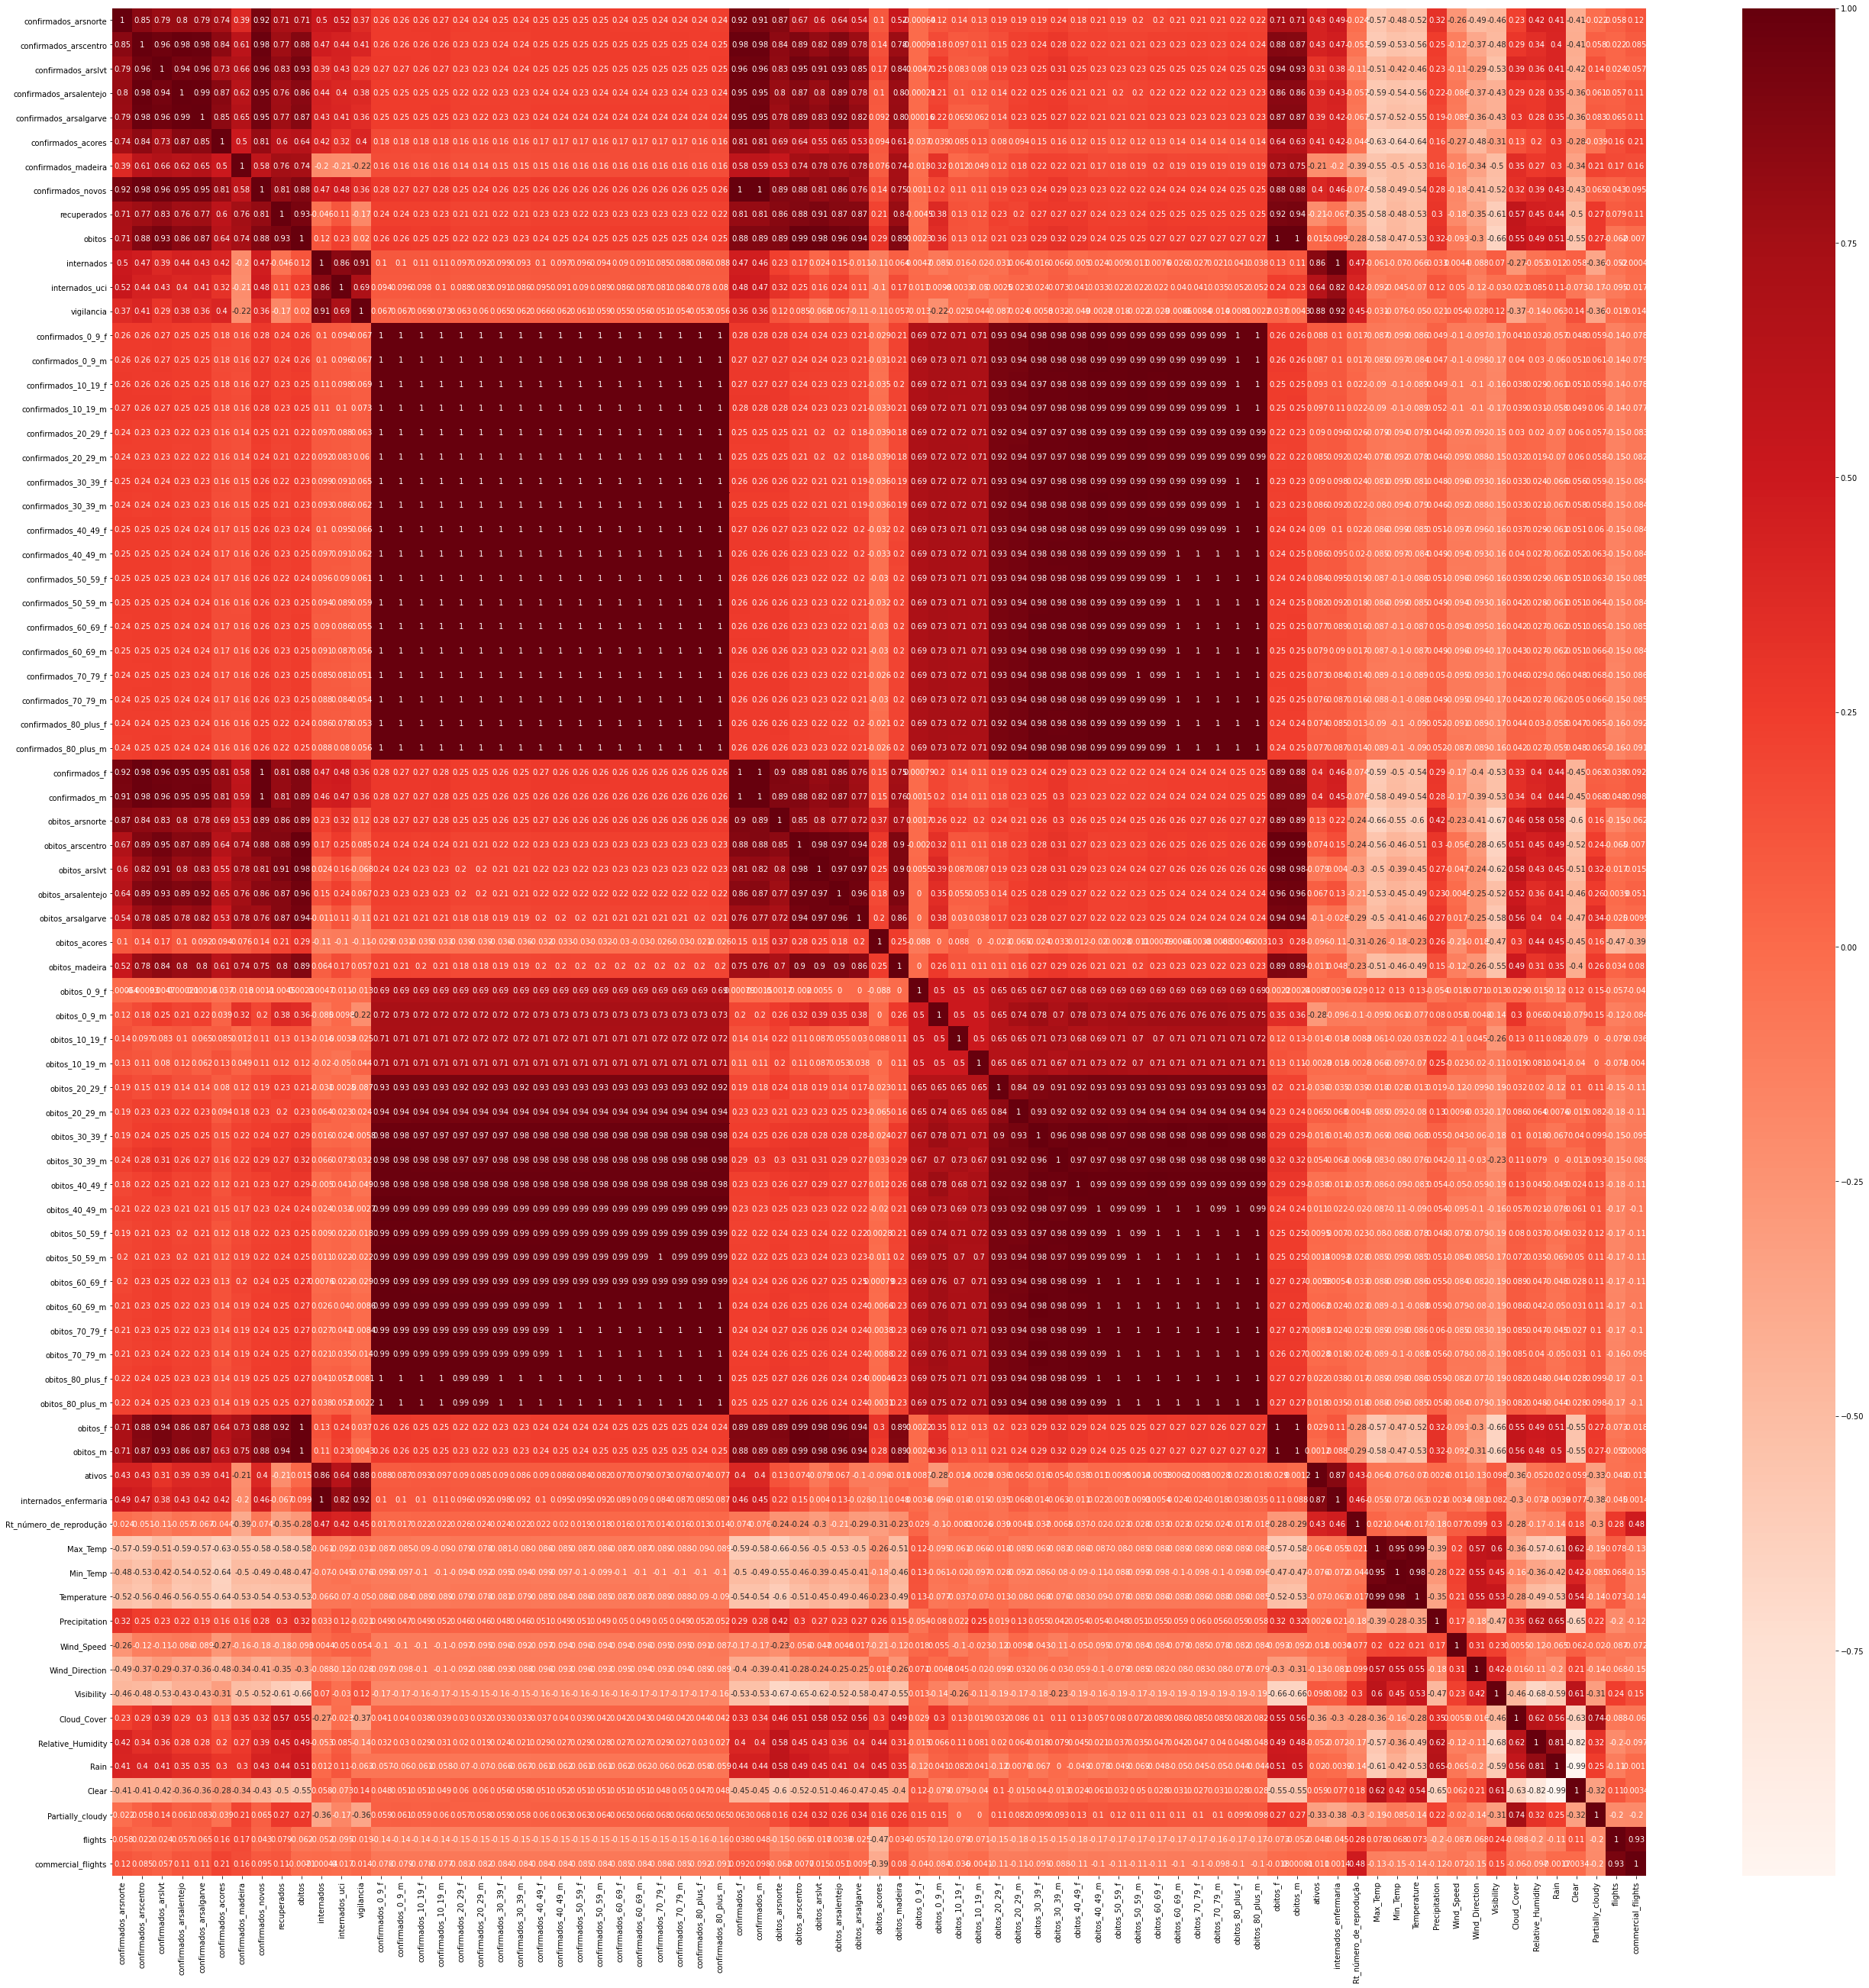

data
2020-03-22      14.0
2020-03-29     105.0
2020-04-05     176.0
2020-04-12     209.0
2020-04-19     210.0
2020-04-26     189.0
2020-05-03     140.0
2020-05-10      92.0
2020-05-17      83.0
2020-05-24      98.0
2020-05-31      94.0
2020-06-07      69.0
2020-06-14      38.0
2020-06-21      13.0
2020-06-28      34.0
2020-07-05      50.0
2020-07-12      46.0
2020-07-19      29.0
2020-07-26      28.0
2020-08-02      21.0
2020-08-09      18.0
2020-08-16      22.0
2020-08-23      18.0
2020-08-30      23.0
2020-09-06      21.0
2020-09-13      27.0
2020-09-20      45.0
2020-09-27      41.0
2020-10-04      52.0
2020-10-11      75.0
2020-10-18     101.0
2020-10-25     135.0
2020-11-01     228.0
2020-11-08     352.0
2020-11-15     485.0
2020-11-22     516.0
2020-11-29     530.0
2020-12-06     536.0
2020-12-13     596.0
2020-12-20     575.0
2020-12-27     485.0
2021-01-03     499.0
2021-01-10     685.0
2021-01-17    1058.0
2021-01-24    1608.0
2021-01-31    2013.0
2021-02-07    1676.0
2021-02-

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(45,45))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(dataset['obitos'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [ ]:
cor_target

data
2020-03-01      0.0
2020-03-08      0.0
2020-03-15      0.0
2020-03-22     14.0
2020-03-29    105.0
              ...  
2021-03-28     69.0
2021-04-04     42.0
2021-04-11     37.0
2021-04-18     29.0
2021-04-25      7.0
Name: obitos, Length: 61, dtype: float64

Calcular as features com correlação maior que 0.95 entre si para remover uma delas

In [ ]:
c = set()

for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > 0.95:
            colname = cor.columns[i]
            c.add(colname)

In [ ]:
c

{'Clear',
 'Temperature',
 'confirmados_0_9_m',
 'confirmados_10_19_f',
 'confirmados_10_19_m',
 'confirmados_20_29_f',
 'confirmados_20_29_m',
 'confirmados_30_39_f',
 'confirmados_30_39_m',
 'confirmados_40_49_f',
 'confirmados_40_49_m',
 'confirmados_50_59_f',
 'confirmados_50_59_m',
 'confirmados_60_69_f',
 'confirmados_60_69_m',
 'confirmados_70_79_f',
 'confirmados_70_79_m',
 'confirmados_80_plus_f',
 'confirmados_80_plus_m',
 'confirmados_arsalentejo',
 'confirmados_arsalgarve',
 'confirmados_arslvt',
 'confirmados_f',
 'confirmados_m',
 'confirmados_novos',
 'internados_enfermaria',
 'obitos_30_39_f',
 'obitos_30_39_m',
 'obitos_40_49_f',
 'obitos_40_49_m',
 'obitos_50_59_f',
 'obitos_50_59_m',
 'obitos_60_69_f',
 'obitos_60_69_m',
 'obitos_70_79_f',
 'obitos_70_79_m',
 'obitos_80_plus_f',
 'obitos_80_plus_m',
 'obitos_arsalentejo',
 'obitos_arsalgarve',
 'obitos_arscentro',
 'obitos_arslvt',
 'obitos_f',
 'obitos_m'}

In [ ]:
dataset.columns

Index(['confirmados_arsnorte', 'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_novos',
       'recuperados', 'obitos', 'internados', 'internados_uci', 'vigilancia',
       'confirmados_0_9_f', 'confirmados_0_9_m', 'confirmados_10_19_f',
       'confirmados_10_19_m', 'confirmados_20_29_f', 'confirmados_20_29_m',
       'confirmados_30_39_f', 'confirmados_30_39_m', 'confirmados_40_49_f',
       'confirmados_40_49_m', 'confirmados_50_59_f', 'confirmados_50_59_m',
       'confirmados_60_69_f', 'confirmados_60_69_m', 'confirmados_70_79_f',
       'confirmados_70_79_m', 'confirmados_80_plus_f', 'confirmados_80_plus_m',
       'confirmados_f', 'confirmados_m', 'obitos_arsnorte', 'obitos_arscentro',
       'obitos_arslvt', 'obitos_arsalentejo', 'obitos_arsalgarve',
       'obitos_acores', 'obitos_madeira', 'obitos_0_9_f', 'obitos_0_9_m',
       'obitos_10_19_f', 'obitos_1

Como entendemos que temos muitas features, após observar a matriz de correlações de pearson, fizemos um filtro preliminas de features, eliminando features cuja correlação fosse maior que +/-0.95.

Correlações Altas (remover features da direita)
*   Clear<-(-0.99)->'Rain'
*   Temperature<-(0.99)->'Max_Temp'
*   Temperature<-(0.98)->'Min_Temp'
*   internados<-(1)->'internados_enfermaria'
*   confirmados_80_plus_m <-(entre 1 e 0.95)-> ['confirmados_0_9_m','confirmados_10_19_f', 'confirmados_10_19_m', 'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f', 'confirmados_30_39_m','confirmados_40_49_f', 'confirmados_40_49_m', 'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f', 'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m', 'confirmados_80_plus_f', 'obitos_30_39_f', 'obitos_30_39_m', 'obitos_40_49_f', 'obitos_40_49_m', 'obitos_50_59_f', 'obitos_50_59_m', 'obitos_60_69_f', 'obitos_60_69_m', 'obitos_70_79_f', 'obitos_70_79_m', 'obitos_80_plus_f','obitos_80_plus_m']
*   confirmados_novos <-(entre 1 e 0.95)-> ['confirmados_m', 'confirmados_f','confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve']
*   obitos_arscentro<-(entre 1 e 0.95)->[obitos_arsalgarve,obitos_arsalentejo,obitos_arslvt, obitos_f, obitos_m]  


In [ ]:
dataset.columns

Index(['confirmados_arsnorte', 'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_novos',
       'recuperados', 'obitos', 'internados', 'internados_uci', 'vigilancia',
       'confirmados_0_9_f', 'confirmados_0_9_m', 'confirmados_10_19_f',
       'confirmados_10_19_m', 'confirmados_20_29_f', 'confirmados_20_29_m',
       'confirmados_30_39_f', 'confirmados_30_39_m', 'confirmados_40_49_f',
       'confirmados_40_49_m', 'confirmados_50_59_f', 'confirmados_50_59_m',
       'confirmados_60_69_f', 'confirmados_60_69_m', 'confirmados_70_79_f',
       'confirmados_70_79_m', 'confirmados_80_plus_f', 'confirmados_80_plus_m',
       'confirmados_f', 'confirmados_m', 'obitos_arsnorte', 'obitos_arscentro',
       'obitos_arslvt', 'obitos_arsalentejo', 'obitos_arsalgarve',
       'obitos_acores', 'obitos_madeira', 'obitos_0_9_f', 'obitos_0_9_m',
       'obitos_10_19_f', 'obitos_1

In [ ]:
dataset = dataset.drop(columns=['Rain','Max_Temp','Min_Temp','internados_enfermaria','confirmados_0_9_m','confirmados_10_19_f', 
                                'confirmados_10_19_m', 'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f', 
                                'confirmados_30_39_m','confirmados_40_49_f', 'confirmados_40_49_m', 'confirmados_50_59_f', 
                                'confirmados_50_59_m', 'confirmados_60_69_f', 'confirmados_60_69_m', 'confirmados_70_79_f', 
                                'confirmados_70_79_m', 'confirmados_80_plus_f', 'obitos_30_39_f', 'obitos_30_39_m', 'obitos_40_49_f', 
                                'obitos_40_49_m', 'obitos_50_59_f', 'obitos_50_59_m', 'obitos_60_69_f', 'obitos_60_69_m', 'obitos_70_79_f', 
                                'obitos_70_79_m', 'obitos_80_plus_f','obitos_80_plus_m','confirmados_m', 'confirmados_f',
                                'confirmados_arscentro', 'confirmados_arslvt', 'confirmados_arsalentejo', 'confirmados_arsalgarve',
                                'obitos_arsalgarve','obitos_arsalentejo','obitos_arslvt', 'obitos_f', 'obitos_m'])

In [ ]:
dataset.shape

(61, 34)

## Feature selection com SelectKBest

In [ ]:
df_data = dataset.drop(columns='obitos')
df_label = dataset['obitos']

In [ ]:
# Feature extraction
# test = SelectKBest(score_func=chi2)
# fit = test.fit_transform(df_data, df_label)
sel_f = SelectKBest(f_regression, k=18)
X_train_f = sel_f.fit_transform(df_data, df_label)
print(sel_f.get_support())


[ True  True  True  True  True False False False False False  True  True
  True  True False  True False False False False False  True  True  True
 False  True  True  True  True  True False False False]


confirmados_arsnorte confirmados_acores	confirmados_madeira	confirmados_novos	recuperados obitos_arsnorte	obitos_arscentro	obitos_acores	obitos_madeira obitos_0_9_m	Rt_número_de_reprodução	Temperature	Precipitation	Wind_Direction	Visibility	Cloud_Cover	Relative_Humidity	Clear

In [ ]:
df_data

,confirmados_arsnorte,confirmados_acores,confirmados_madeira,confirmados_novos,recuperados,internados,internados_uci,vigilancia,confirmados_0_9_f,confirmados_80_plus_m,obitos_arsnorte,obitos_arscentro,obitos_acores,obitos_madeira,obitos_0_9_f,obitos_0_9_m,obitos_10_19_f,obitos_10_19_m,obitos_20_29_f,obitos_20_29_m,ativos,Rt_número_de_reprodução,Temperature,Precipitation,Wind_Speed,Wind_Direction,Visibility,Cloud_Cover,Relative_Humidity,Clear,Partially_cloudy,flights,commercial_flights
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.896517,14.457143,0.615714,22.271429,247.387143,10.614286,4.885714,76.040000,0.571429,0.000000,177311.142857,104781.857143
2020-03-08,22.0,0.0,0.0,30,0.0,30.0,0.0,447.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1.680989,14.614286,0.648571,23.671429,251.834286,11.114286,6.442857,74.551429,0.428571,0.000000,178796.428571,103299.142857
2020-03-15,81.0,1.0,0.0,215,2.0,109.0,9.0,4145.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,1.765696,16.014286,0.000000,20.614286,257.524286,11.085714,3.800000,68.810000,1.000000,0.000000,167279.714286,96839.285714
2020-03-22,722.0,3.0,7.0,1355,3.0,30.0,32.0,7970.0,17.0,42.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1338.0,1.539454,14.171429,0.972857,22.900000,185.542857,10.400000,1.571429,67.730000,0.571429,0.000000,123842.857143,70288.857143
2020-03-29,2725.0,29.0,36.0,4362,38.0,317.0,97.0,5223.0,23.0,201.0,56.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4219.0,1.215434,14.657143,0.000000,21.771429,187.704286,10.500000,2.028571,67.115714,1.000000,0.000000,83941.000000,42447.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-28,739.0,81.0,198.0,2877,8072.0,-132.0,-28.0,616.0,48.0,118.0,11.0,12.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-5264.0,0.943944,14.785714,0.000000,18.914286,208.292857,10.485714,0.771429,59.792857,1.000000,0.000000,162488.428571,76660.857143
2021-04-04,882.0,51.0,124.0,2928,4931.0,-116.0,-25.0,1358.0,148.0,96.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2045.0,1.016639,16.885714,0.830000,20.700000,185.434286,10.214286,3.000000,71.342857,0.857143,0.000000,171999.000000,77864.285714
2021-04-11,1307.0,264.0,161.0,4159,4296.0,-51.0,-4.0,782.0,164.0,92.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-174.0,1.064734,16.157143,2.202857,20.542857,231.942857,10.428571,5.657143,72.708571,0.714286,0.000000,168114.857143,79368.571429


## Feature selection of Lag Variables com Random Forest Regressor

We can also use feature selection to automatically identify and select those input features that are most predictive.

A popular method for feature selection is called Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

The code below uses RFE with a random forest predictive model and sets the desired number of input features to 10.

(A bar graph is also created showing the feature selection rank (smaller is better) for each input feature.)

Selected Features:
confirmados_arsnorte
confirmados_acores
confirmados_madeira
confirmados_novos
recuperados
internados
internados_uci
vigilancia
confirmados_0_9_f
confirmados_80_plus_m
obitos_arsnorte
obitos_acores
Precipitation
Wind_Speed
Wind_Direction
Visibility
Relative_Humidity
flights


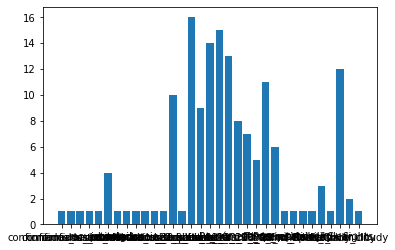

In [ ]:
# separate into input and output variables
array = dataset.values
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=18)
fit = rfe.fit(df_data, df_label)
# report selected features
print('Selected Features:')
names = dataset.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataset.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

## Escolha final de features:
Após fazer estes dois métodos de selecção de features, e visto que o seus resultados fazem bastante overlap, decidimos escolher as features resultantes iguais, bem como manter as diferentes. 

confirmados_arsnorte confirmados_acores	confirmados_madeira	confirmados_novos	recuperados obitos_arsnorte	obitos_arscentro	obitos_acores	obitos_madeira obitos_0_9_m	Rt_número_de_reprodução	Temperature	Precipitation	Wind_Direction	Visibility	Cloud_Cover	Relative_Humidity	Clear


confirmados_arsnorte
confirmados_acores
confirmados_madeira
confirmados_novos
recuperados
internados
internados_uci
vigilancia
confirmados_0_9_f
confirmados_80_plus_m
obitos_arsnorte
obitos_acores
Precipitation
Wind_Speed
Wind_Direction
Visibility
Relative_Humidity
flights

In [ ]:
df_data.columns

Index(['confirmados_arsnorte', 'confirmados_acores', 'confirmados_madeira',
       'confirmados_novos', 'recuperados', 'internados', 'internados_uci',
       'vigilancia', 'confirmados_0_9_f', 'confirmados_80_plus_m',
       'obitos_arsnorte', 'obitos_arscentro', 'obitos_acores',
       'obitos_madeira', 'obitos_0_9_f', 'obitos_0_9_m', 'obitos_10_19_f',
       'obitos_10_19_m', 'obitos_20_29_f', 'obitos_20_29_m', 'ativos',
       'Rt_número_de_reprodução', 'Temperature', 'Precipitation', 'Wind_Speed',
       'Wind_Direction', 'Visibility', 'Cloud_Cover', 'Relative_Humidity',
       'Clear', 'Partially_cloudy', 'flights', 'commercial_flights'],
      dtype='object')

In [ ]:
df_data = df_data.drop(columns=['obitos_arscentro', 'obitos_madeira', 'obitos_0_9_f', 'obitos_0_9_m', 'obitos_10_19_f',
                    'obitos_10_19_m', 'obitos_20_29_f', 'obitos_20_29_m', 'ativos', 'Rt_número_de_reprodução', 'Temperature', 'Cloud_Cover',
                    'Clear', 'Partially_cloudy', 'commercial_flights'])
# df_data = df_data.drop(columns=[ 'obitos_0_9_f', 'obitos_10_19_f', 'obitos_10_19_m', 'obitos_20_29_f', 'obitos_20_29_m',
#                                 'ativos', 'Partially_cloudy', 'commercial_flights'])
df_data.shape

(61, 25)

In [ ]:
df_data.columns

Index(['confirmados_arsnorte', 'confirmados_acores', 'confirmados_madeira',
       'confirmados_novos', 'recuperados', 'internados', 'internados_uci',
       'vigilancia', 'confirmados_0_9_f', 'confirmados_80_plus_m',
       'obitos_arsnorte', 'obitos_arscentro', 'obitos_acores',
       'obitos_madeira', 'obitos_0_9_m', 'Rt_número_de_reprodução',
       'Temperature', 'Precipitation', 'Wind_Speed', 'Wind_Direction',
       'Visibility', 'Cloud_Cover', 'Relative_Humidity', 'Clear', 'flights'],
      dtype='object')